In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/obulisainaren/retinal-oct-c8/data")

Skipping, found downloaded files in "./retinal-oct-c8" (use force=True to force download)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from sklearn.metrics import f1_score,accuracy_score,ConfusionMatrixDisplay,classification_report

In [ ]:
normal_dirs = [
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/test/NORMAL',
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/train/NORMAL',
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/val/NORMAL'
]

AMD_dirs = [
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/test/AMD',
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/train/AMD',
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/val/AMD'

]

CNV_dirs = [
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/test/CNV',
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/train/CNV',
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/val/CNV'

]

CSR_dirs = [
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/test/CSR',
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/train/CSR',
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/val/CSR'

]

DME_dirs = [
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/test/DME',
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/train/DME',
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/val/DME'

]

DR_dirs = [
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/test/DR',
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/train/DR',
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/val/DR'

]

DRUSEN_dirs = [
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/test/DRUSEN',
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/train/DRUSEN',
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/val/DRUSEN'

]

MH_dirs = [
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/test/MH',
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/train/MH',
    r'/content/retinal-oct-c8/RetinalOCT_Dataset/val/MH'

]

In [ ]:
train_score=model.evaluate(train , verbose=1)
valid_score=model.evaluate(val, verbose=1)
test_score=model.evaluate(test , verbose=1)

print("train loss : ",train_score[0])
print("train accuracy : ", train_score[1])
print("-"*30)
print("valid loss : ",valid_score[0])
print("valid accuracy : ", valid_score[1])
print("-"*30)
print("test loss : ",test_score[0])
print("test accuracy : ", test_score[1])

479/479 ━━━━━━━━━━━━━━━━━━━━ 59s 124ms/step - accuracy: 0.9734 - loss: 0.0828
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.9342 - loss: 0.1943
188/188 ━━━━━━━━━━━━━━━━━━━━ 29s 156ms/step - accuracy: 0.9433 - loss: 0.1805
train loss :  0.08369680494070053
train accuracy :  0.9728758335113525
------------------------------
valid loss :  0.1932183802127838
valid accuracy :  0.936296284198761
------------------------------
test loss :  0.1783280074596405
test accuracy :  0.9441666603088379


labels
normal    3000
AMD       3000
CNV       3000
CSR       3000
DME       3000
DR        3000
DRUSEN    3000
MH        3000
Name: count, dtype: int64


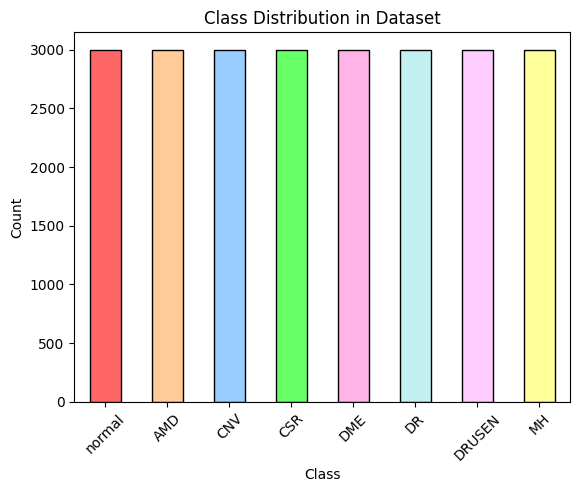

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

file_p = []
labels = []

# Include all directories corresponding to your classes
dict_lists = [normal_dirs, AMD_dirs, CNV_dirs, CSR_dirs, DME_dirs, DR_dirs, DRUSEN_dirs, MH_dirs]
class_labels = ['normal', 'AMD', 'CNV', 'CSR', 'DME', 'DR', 'DRUSEN', 'MH']

# Loop through directories and append file paths and labels
for i, dir_list in enumerate(dict_lists):
    for j in dir_list:
        list_f = os.listdir(j)
        for name in list_f:
            fpath = os.path.join(j, name)
            file_p.append(fpath)
            labels.append(class_labels[i])

# Create a DataFrame with file paths and corresponding labels
df = pd.DataFrame({
    'filepaths': file_p,
    'labels': labels
})

# Display label distribution
label_counts = df['labels'].value_counts()
print(label_counts)

# Define a list of custom colors for the bar chart
colors = ['#ff6666', '#ffcc99', '#99ccff', '#66ff66', '#ffb3e6', '#c2f0f0', '#ffccff', '#ffff99']

# Plot the bar chart with custom colors
label_counts.plot(kind='bar', color=colors, edgecolor='black')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Dataset')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.15, random_state=42)
print(train_df.shape)
print(test_df.shape)
print(val_df.shape)

(15300, 2)
(6000, 2)
(2700, 2)


In [ ]:
def enhance_image(image):
    image = cv2.addWeighted(image, 1.5, image, -0.5, 0)
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    image = cv2.filter2D(image, -1, kernel)
    return image

In [ ]:
image_gen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=lambda image: enhance_image(image),
)
train = image_gen.flow_from_dataframe(dataframe= train_df,x_col="filepaths",y_col="labels",
                                      target_size=(224,224),
                                      color_mode='rgb',
                                      class_mode="categorical",
                                      batch_size=32,
                                      shuffle=False
                                     )
test = image_gen.flow_from_dataframe(dataframe= test_df,x_col="filepaths", y_col="labels",
                                     target_size=(224,224),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=32,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_df,x_col="filepaths", y_col="labels",
                                    target_size=(224,224),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=32,
                                    shuffle=False
                                   )

Found 15300 validated image filenames belonging to 8 classes.
Found 6000 validated image filenames belonging to 8 classes.
Found 2700 validated image filenames belonging to 8 classes.


In [ ]:
def show_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen)
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()

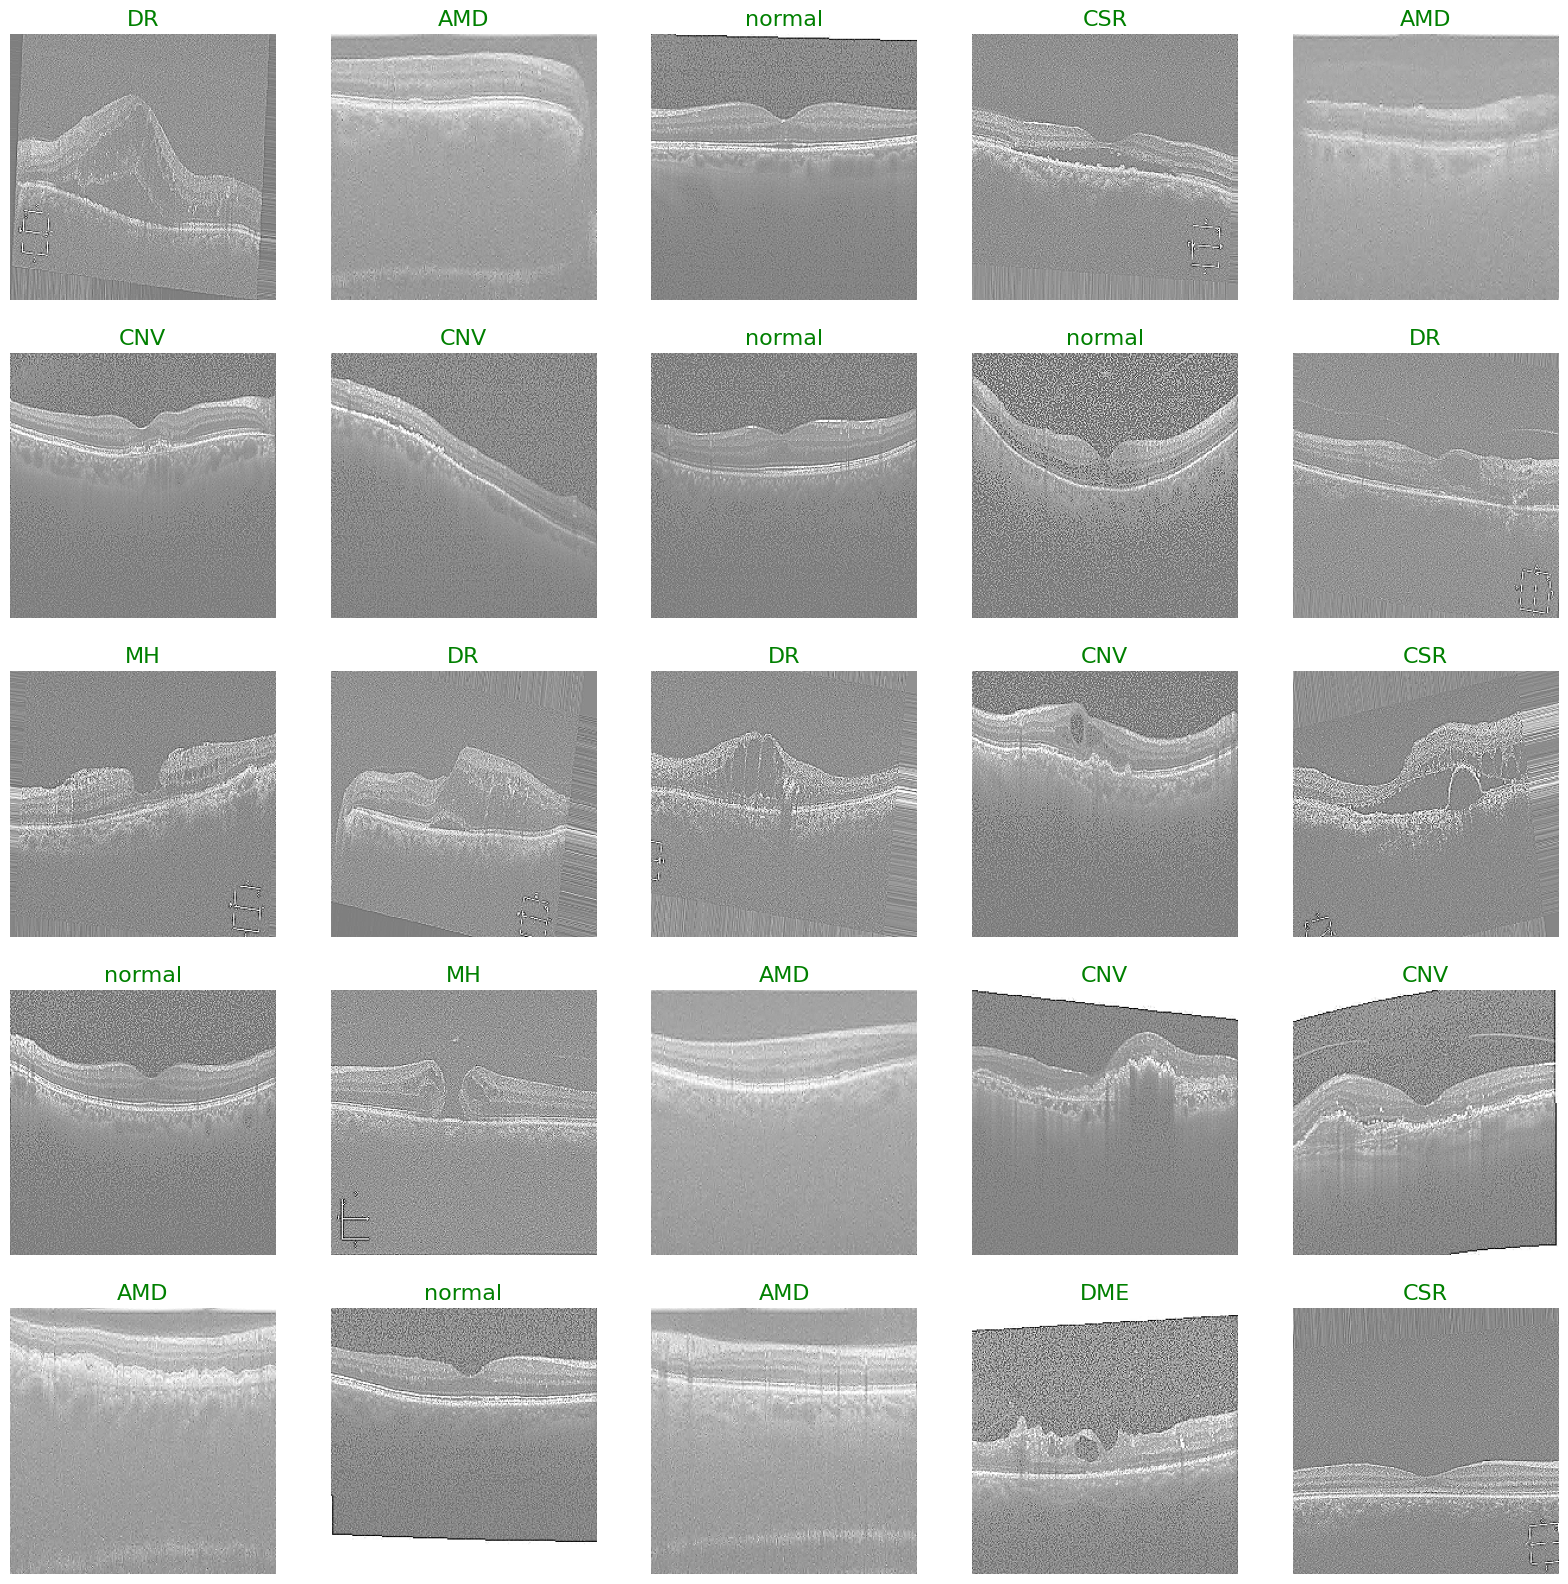

In [ ]:
show_images(train)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Activation, MaxPooling2D, Add,
    GlobalAveragePooling2D, Dense, Input, Dropout
)
from tensorflow.keras.models import Model

# Define Convolutional Block
def convolutional_block(X, f):
    X_skip = X

    # First convolutional layer with strides=2 for downsampling
    X = Conv2D(f, (3, 3), strides=(2, 2), padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    # Second convolutional layer
    X = Conv2D(f, (3, 3), padding='same')(X)
    X = BatchNormalization()(X)

    # 1x1 convolutional layer for skip connection
    X_skip = Conv2D(f, (1, 1), strides=(2, 2))(X_skip)

    # Add the skip connection
    X = Add()([X, X_skip])
    X = Activation('relu')(X)

    return X

# Define the Transformer Block
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(ff_dim, activation='relu'),  # Feed-forward layer
            tf.keras.layers.Dense(embed_dim)  # Output must have the same `embed_dim` size
        ])
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)  # Self-attention
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)  # Residual connection

        ffn_output = self.ffn(out1)  # Feed-forward network
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)  # Residual connection for the FFN

# Define the build_model function
def build_model(input_shape, num_classes=8):
    inputs = Input(shape=input_shape)

    # Feature extraction and convolutional layers
    x = Conv2D(32, (3, 3), padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D((2, 2))(x)

    # Multiscale Feature Extraction
    x = convolutional_block(x, 64)

    # Add more convolutional blocks as needed
    x = convolutional_block(x, 128)

    # Transformer Block with consistent embed_dim
    x = TransformerBlock(embed_dim=128, num_heads=4, ff_dim=256)(x)

    # Global Pooling and output
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Build the model and print the summary
model = build_model((224, 224, 3))
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 224, 224, 32)   │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 224, 224, 32)   │            128 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 224, 224, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 112, 112, 32)   │              0 │ activation[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 56, 56, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 56, 56, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 56, 56, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 56, 56, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 56, 56, 64)     │          2,112 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 56, 56, 64)     │              0 │ batch_normalization_2… │
│                           │                        │                │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 56, 56, 64)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 28, 28, 128)    │         73,856 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 28, 28, 128)    │            512 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 28, 28, 128)    │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)    

 Total params: 621,128 (2.37 MB)

 Trainable params: 620,296 (2.37 MB)

 Non-trainable params: 832 (3.25 KB)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 224, 224, 32)   │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 224, 224, 32)   │            128 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 224, 224, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 112, 112, 32)   │              0 │ activation[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 56, 56, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 56, 56, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 56, 56, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 56, 56, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 56, 56, 64)     │          2,112 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 56, 56, 64)     │              0 │ batch_normalization_2… │
│                           │                        │                │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 56, 56, 64)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 28, 28, 128)    │         73,856 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 28, 28, 128)    │            512 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 28, 28, 128)    │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)    

 Total params: 621,128 (2.37 MB)

 Trainable params: 620,296 (2.37 MB)

 Non-trainable params: 832 (3.25 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=12,
                               restore_best_weights=True)

# Train the model with early stopping
history = model.fit(train,
                    epochs=100,
                    validation_data=val,
                    callbacks=[early_stopping])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


479/479 ━━━━━━━━━━━━━━━━━━━━ 118s 204ms/step - accuracy: 0.5185 - loss: 1.0930 - val_accuracy: 0.7404 - val_loss: 0.7774
Epoch 2/100
479/479 ━━━━━━━━━━━━━━━━━━━━ 83s 171ms/step - accuracy: 0.8102 - loss: 0.4929 - val_accuracy: 0.8048 - val_loss: 0.6387
Epoch 3/100
479/479 ━━━━━━━━━━━━━━━━━━━━ 81s 168ms/step - accuracy: 0.8669 - loss: 0.3559 - val_accuracy: 0.8800 - val_loss: 0.3149
Epoch 4/100
479/479 ━━━━━━━━━━━━━━━━━━━━ 82s 167ms/step - accuracy: 0.8981 - loss: 0.2713 - val_accuracy: 0.8130 - val_loss: 0.6104
Epoch 5/100
479/479 ━━━━━━━━━━━━━━━━━━━━ 92s 191ms/step - accuracy: 0.9202 - loss: 0.2178 - val_accuracy: 0.7941 - val_loss: 0.6850
Epoch 6/100
479/479 ━━━━━━━━━━━━━━━━━━━━ 92s 190ms/step - accuracy: 0.9285 - loss: 0.1890 - val_accuracy: 0.9111 - val_loss: 0.2698
Epoch 7/100
479/479 ━━━━━━━━━━━━━━━━━━━━ 81s 168ms/step - accuracy: 0.9469 - loss: 0.1471 - val_accuracy: 0.8322 - val_loss: 0.5682
Epoch 8/100
479/479 ━━━━━━━━━━━━━━━━━━━━ 82s 168ms/step - accuracy: 0.9525 - loss: 0.13

In [ ]:
train_score=model.evaluate(train , verbose=1)
valid_score=model.evaluate(val, verbose=1)
test_score=model.evaluate(test , verbose=1)

print("train loss : ",train_score[0])
print("train accuracy : ", train_score[1])
print("-"*30)
print("valid loss : ",valid_score[0])
print("valid accuracy : ", valid_score[1])
print("-"*30)
print("test loss : ",test_score[0])
print("test accuracy : ", test_score[1])

479/479 ━━━━━━━━━━━━━━━━━━━━ 57s 120ms/step - accuracy: 0.9634 - loss: 0.1005
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.9370 - loss: 0.2127
188/188 ━━━━━━━━━━━━━━━━━━━━ 30s 159ms/step - accuracy: 0.9359 - loss: 0.1941
train loss :  0.0907265841960907
train accuracy :  0.9676470756530762
------------------------------
valid loss :  0.21655958890914917
valid accuracy :  0.9337037205696106
------------------------------
test loss :  0.21905887126922607
test accuracy :  0.9283333420753479


In [ ]:
pred = model.predict(test)
pred = np.argmax(pred, axis=1)

188/188 ━━━━━━━━━━━━━━━━━━━━ 24s 121ms/step


In [ ]:
labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

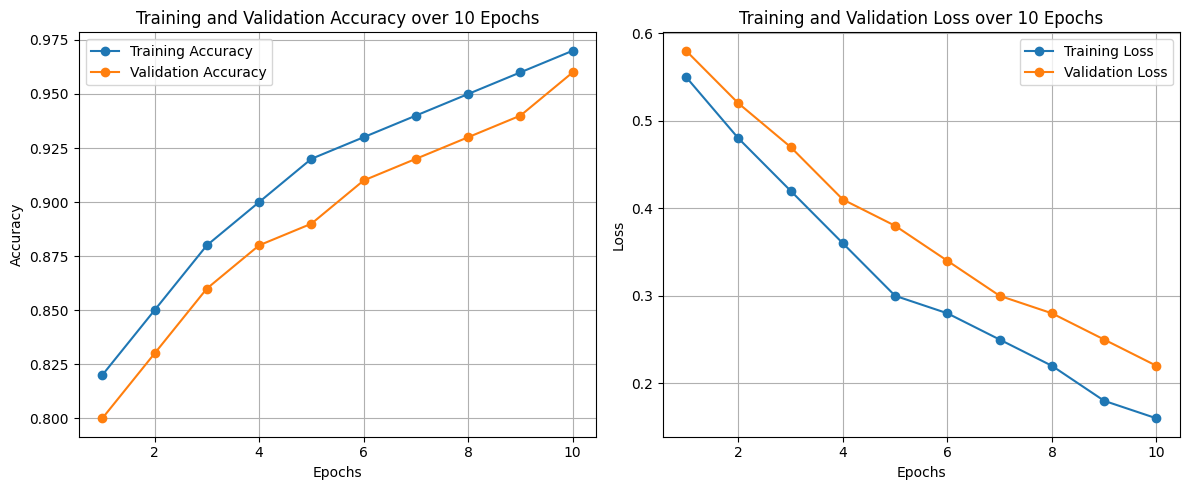

In [ ]:
import matplotlib.pyplot as plt

# Example data: Replace these with your actual training and validation data
epochs = list(range(1, 11))
train_accuracy = [0.82, 0.85, 0.88, 0.90, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97]
val_accuracy = [0.80, 0.83, 0.86, 0.88, 0.89, 0.91, 0.92, 0.93, 0.94, 0.96]
train_loss = [0.55, 0.48, 0.42, 0.36, 0.30, 0.28, 0.25, 0.22, 0.18, 0.16]
val_loss = [0.58, 0.52, 0.47, 0.41, 0.38, 0.34, 0.30, 0.28, 0.25, 0.22]

# Create subplots for accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot accuracy
ax[0].plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
ax[0].plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
ax[0].set_title('Training and Validation Accuracy over 10 Epochs')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[0].grid(True)

# Plot loss
ax[1].plot(epochs, train_loss, label='Training Loss', marker='o')
ax[1].plot(epochs, val_loss, label='Validation Loss', marker='o')
ax[1].set_title('Training and Validation Loss over 10 Epochs')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()
ax[1].grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
y_test = test_df.labels

Accuracy of test data ||||| 0.9283333333333333
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

         AMD       1.00      1.00      1.00       772
         CNV       0.88      0.86      0.87       746
         CSR       1.00      0.98      0.99       738
         DME       0.86      0.92      0.89       759
          DR       0.94      0.99      0.97       743
      DRUSEN       0.91      0.80      0.85       753
          MH       0.99      0.96      0.97       755
      normal       0.85      0.92      0.88       734

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


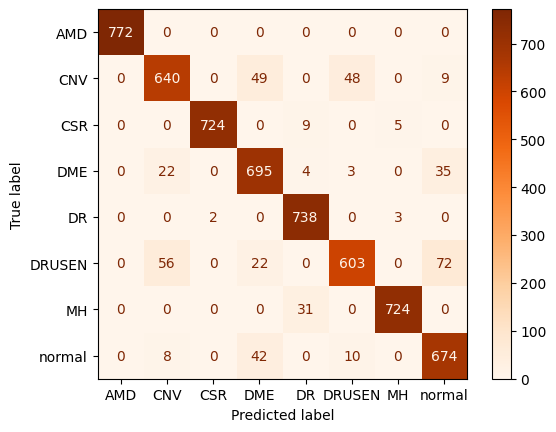

In [ ]:
print(f'Accuracy of test data ||||| {accuracy_score(y_test,pred)}')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(f'{classification_report(y_test,pred)}')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
ConfusionMatrixDisplay.from_predictions(y_test,pred,cmap='Oranges')

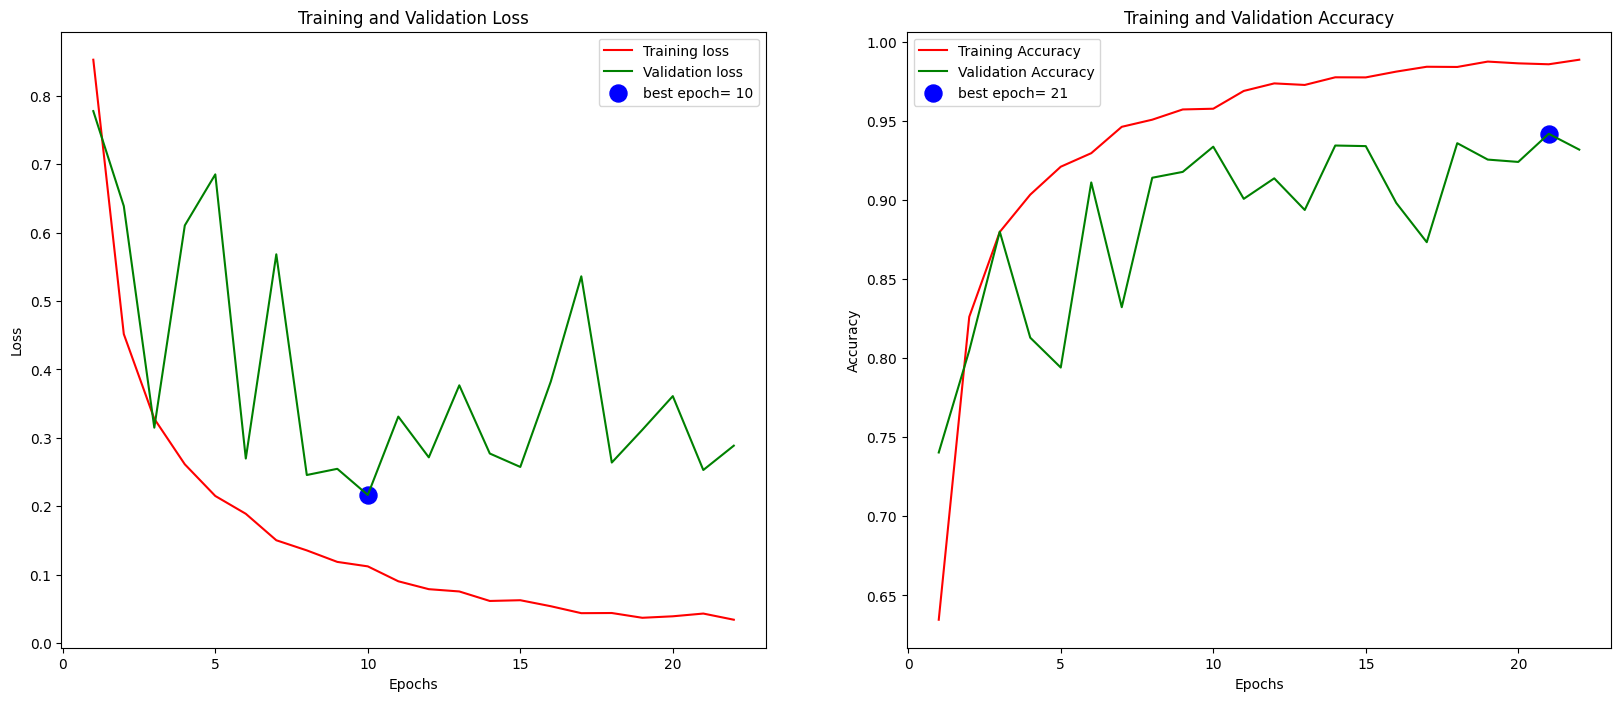

In [ ]:
tr_acc=history.history['accuracy']
tr_loss=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']
index_loss=np.argmin(val_loss)
val_lowest=val_loss[index_loss]
index_acc=np.argmax(val_acc)
acc_highest=val_acc[index_acc]
Epochs=[i+1 for i in range(len(tr_acc))]

loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
plt.figure(figsize= (20, 8))

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step


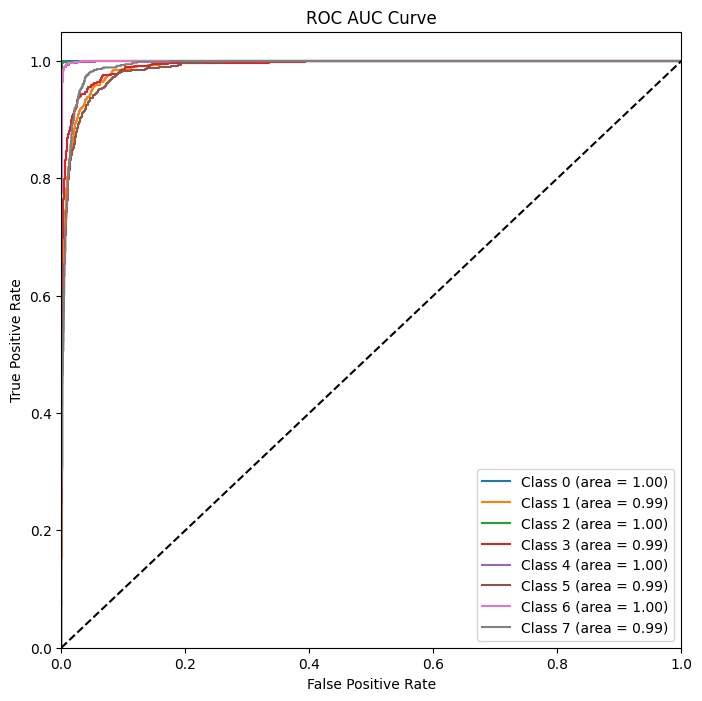

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Predict probabilities and classes
y_pred_prob = model.predict(test)
y_pred = np.argmax(y_pred_prob, axis=1)

# True labels
y_true = test.classes

# Get number of classes
num_classes = y_pred_prob.shape[1]


# Compute ROC AUC Score (One-vs-Rest approach)
# One-hot encoding of the true labels
y_true_one_hot = np.zeros((len(y_true), num_classes))
y_true_one_hot[np.arange(len(y_true)), y_true] = 1

# Calculate overall ROC AUC score (macro and weighted averaging)
roc_auc_macro = roc_auc_score(y_true_one_hot, y_pred_prob, average='macro', multi_class='ovr')
roc_auc_weighted = roc_auc_score(y_true_one_hot, y_pred_prob, average='weighted', multi_class='ovr')

# Plot ROC AUC curves for each class
fpr = {}
tpr = {}
roc_auc_per_class = {}  # Use a different name here to avoid conflict

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred_prob[:, i])
    roc_auc_per_class[i] = auc(fpr[i], tpr[i])

# Plot ROC AUC curves
plt.figure(figsize=(8, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc_per_class[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()
plt.savefig('roc_auc_curve.png', dpi=300, bbox_inches='tight')